## Polygons

We will use them to:

    1. check for intersections
    2. check if a point is inside a polygon
    3. draw polygons from visibility to get vis regions and store them
    


In [37]:
from skgeom import *

In [49]:
def intersectHelper(segment, node):
    '''
        Intersection helper to find the same between a halfedge and a node (list of segments).
        @returns-> List of segments

        TODO: Remove duplicates in ret.
    '''
    ret = []
    part1 = Segment2(segment.source().point(), segment.target().point())

    for segs in node:
        isx = intersection(part1, segs)
        if type(isx) == Segment2:
            ret.append(isx)

    return ret


In [50]:
def visibility(queryPoint, node, arrangement):
    '''
        Plain visible region calculation
        @args:
            query point:Point2  --> query point
            node:[segments] --> Target node
            arrangement:Arrangement --> The arrangement (see docs)
        @returns:
            visible region:[segments]
    '''
    vs = RotationalSweepVisibility(arrangement)
    face = arrangement.find(queryPoint)
    vx = vs.compute_visibility(queryPoint, face)
    vis = []

    # Draw visibility --optional, should be removed in prod
    for he in arr.halfedges:
        draw.draw(he.curve(), visible_point=False)
    draw.draw(queryPoint, color='magenta')

    for v in vx.halfedges:
        vis+=intersectHelper(v,node)

    ret = []
    [ret.append(x) for x in vis if x not in ret]
    for v in ret:
        draw.draw(v, color='red', visible_point=False)

    return ret

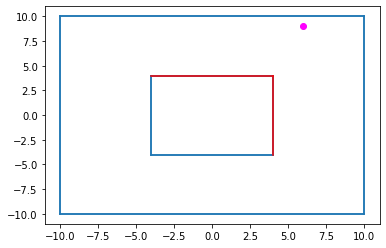

In [51]:
M = 10
outer = [
    Segment2(Point2(-M, -M), Point2(-M, M)), Segment2(Point2(-M, M), Point2(M, M)),
    Segment2(Point2(M, M), Point2(M, -M)), Segment2(Point2(M, -M), Point2(-M, -M))
]
arr = arrangement.Arrangement()

for bounds in outer:
    arr.insert(bounds)

qp = Point2(6,9)

T=4
Target = [
    Segment2(Point2(-T, -T), Point2(-T, T)), Segment2(Point2(-T, T), Point2(T, T)),
    Segment2(Point2(T, T), Point2(T, -T)), Segment2(Point2(T, -T), Point2(-T, -T))
]
for sides in Target:
    arr.insert(sides)

vis = visibility(qp,Target,arr)

In [58]:
VRvertices = [qp]
for seg in vis:
    if(seg.source() not in VRvertices):
        VRvertices.append(seg.source())
    if(seg.target() not in VRvertices):
        VRvertices.append(seg.target())
    
visreg = Polygon(VRvertices)


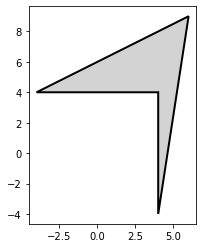

In [59]:
visreg

In [41]:
'''
    Visible Region intersection
'''


'\n    Visible Region intersection\n'